# Air Pollution in Manila

<iframe width="100%" height="500px" src="https://studio.foursquare.com/public/d77ede40-1af0-4274-a175-f6a695094429/embed" frameborder="0" allowfullscreen></iframe>

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# import bokeh
# from bokeh.layouts import Row, column, gridplot
# from bokeh.models import Title, Legend, TapTool, Range1d, TabPanel, Tabs
# import matplotlib as mpl

# from bokeh.core.validation.warnings import EMPTY_LAYOUT, MISSING_RENDERERS
# bokeh.core.validation.silence(EMPTY_LAYOUT, True)
# bokeh.core.validation.silence(MISSING_RENDERERS, True)
# from bokeh.plotting import figure, output_file, show, output_notebook
# from bokeh.models import Span


In [2]:
df = pd.read_csv('../../data/air_pollution/ozone/Manila_Barangay_Monthly_O3.csv')
df = df[['ADM0_EN', 'ADM0_PCODE', 'ADM1_EN', 'ADM1_PCODE',
       'ADM2_EN', 'ADM2_PCODE', 'O3_column_number_density', 'adm4_en','month', '.geo']]
import numpy as np
df['month']= df['month'].astype(np.int64)

year = 2023
df['date'] = pd.to_datetime(df['month'].astype(str) + '/' + str(year), format='%m/%Y')


# Add a time component manually
time_component = '08:00:00'  # Example time component
df['datetime'] = df['date'].dt.strftime('%Y-%m-%d') + ' ' + time_component

air_pollution = pd.DataFrame()
air_pollution = pd.concat([air_pollution,df])

df = pd.read_csv('../../data/air_pollution/ozone/Manila_Barangay_Monthly_O3_2022.csv')
df = df[['ADM0_EN', 'ADM0_PCODE', 'ADM1_EN', 'ADM1_PCODE',
       'ADM2_EN', 'ADM2_PCODE', 'O3_column_number_density', 'adm4_en','month', '.geo']]

import numpy as np
df['month']= df['month'].astype(np.int64)

year = 2022
df['date'] = pd.to_datetime(df['month'].astype(str) + '/' + str(year), format='%m/%Y')

time_component = '08:00:00'  # Example time component
df['datetime'] = df['date'].dt.strftime('%Y-%m-%d') + ' ' + time_component

air_pollution = pd.concat([air_pollution,df])

In [1]:
# Function to convert JSON strings to Polygon objects
def create_polygon(geo_json):
    geo_dict = json.loads(geo_json)
    if geo_dict['type'] == 'Polygon':
        return Polygon(geo_dict['coordinates'][0])

# Apply the function to the 'geo' column to create a new 'geometry' column
air_pollution['geometry'] = air_pollution['geo'].apply(create_polygon)

# Convert the DataFrame to a GeoDataFrame
gdf = gpd.GeoDataFrame(air_pollution, geometry='geometry')

NameError: name 'air_pollution' is not defined

<Axes: xlabel='date'>

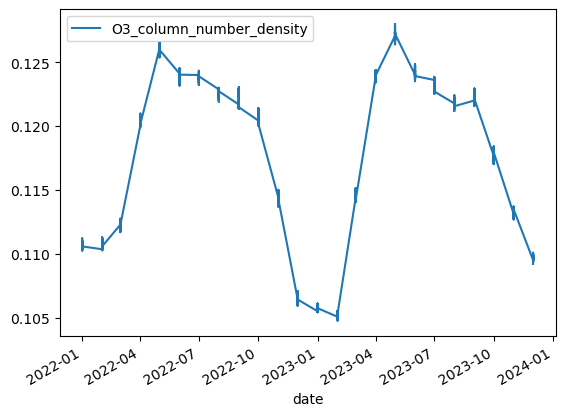

In [11]:
air_pollution[['adm4_en', 'O3_column_number_density', 'date']].set_index(['date']).plot()

In [40]:
air_pollution.to_csv('../../data/air_pollution/monthly_o3_2022-2023.csv')